[ 0.46556481  4.54905479 -0.13803253  0.25799555]


<IPython.core.display.Javascript object>


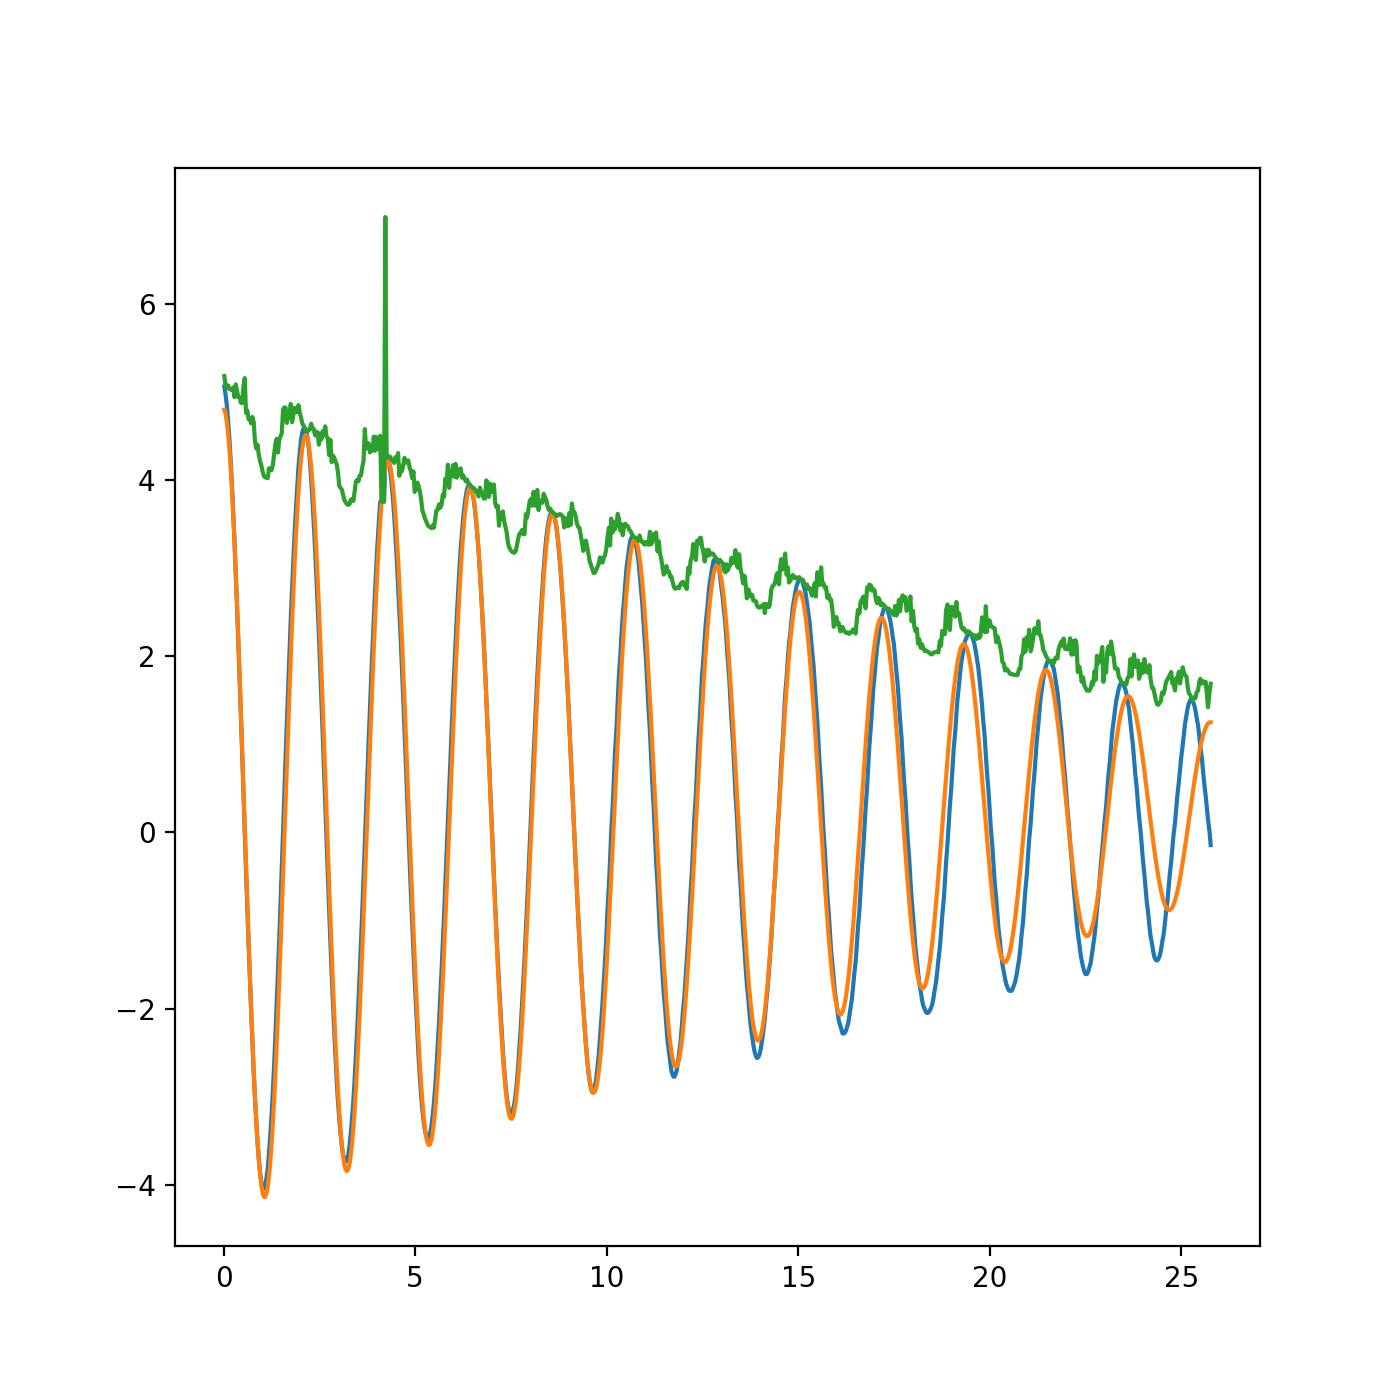

In [1]:

import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit
#print(data)

#Zeit (in s); x (in cm) ; y (in cm); vx (in cm/s) ; vy (in cm/s)
# Read in the file
#filename='Rinne_Elipse.csv'
filename='Rinne_harmonisch_0_25.csv'
with open(filename, 'r') as file:
  filedata = file.read()

# Replace the target string
filedata = filedata.replace(',', '.')

# Write the file out again
with open(filename, 'w') as file:
  file.write(filedata)

data=np.genfromtxt(filename,delimiter=';',skip_header=2)
#Zeit (in s); x (in cm) ; y (in cm); vx (in cm/s) ; vy (in cm/s)
t=data[:,0]
x=-data[:,1]
v=data[:,3]
def func(t,f, A_0, m,d):
    return (A_0+m*t)*np.cos(2*np.pi*f*t)+d

popt, pcov = curve_fit(func, t, x ,p0=[12/25,4,-3/25,0])
print(popt)
fig=plt.figure(figsize=(7,7),dpi=100)
plt.plot(t,x)
plt.plot(t, func(t, *popt))
########################################
# Fancy Einhüllende ultra super fancy weil inspired by Energieerhaltung
D=2
m=0.28
plt.plot(t,np.sqrt(1/2*D*x**2+1/2*m*v**2))
########################################
#plt.show()

N=len(t)
T=t[-1]

sp=np.fft.fft(x)
freq=np.fft.fftfreq(t.shape[-1],d=T/N)

<IPython.core.display.Javascript object>


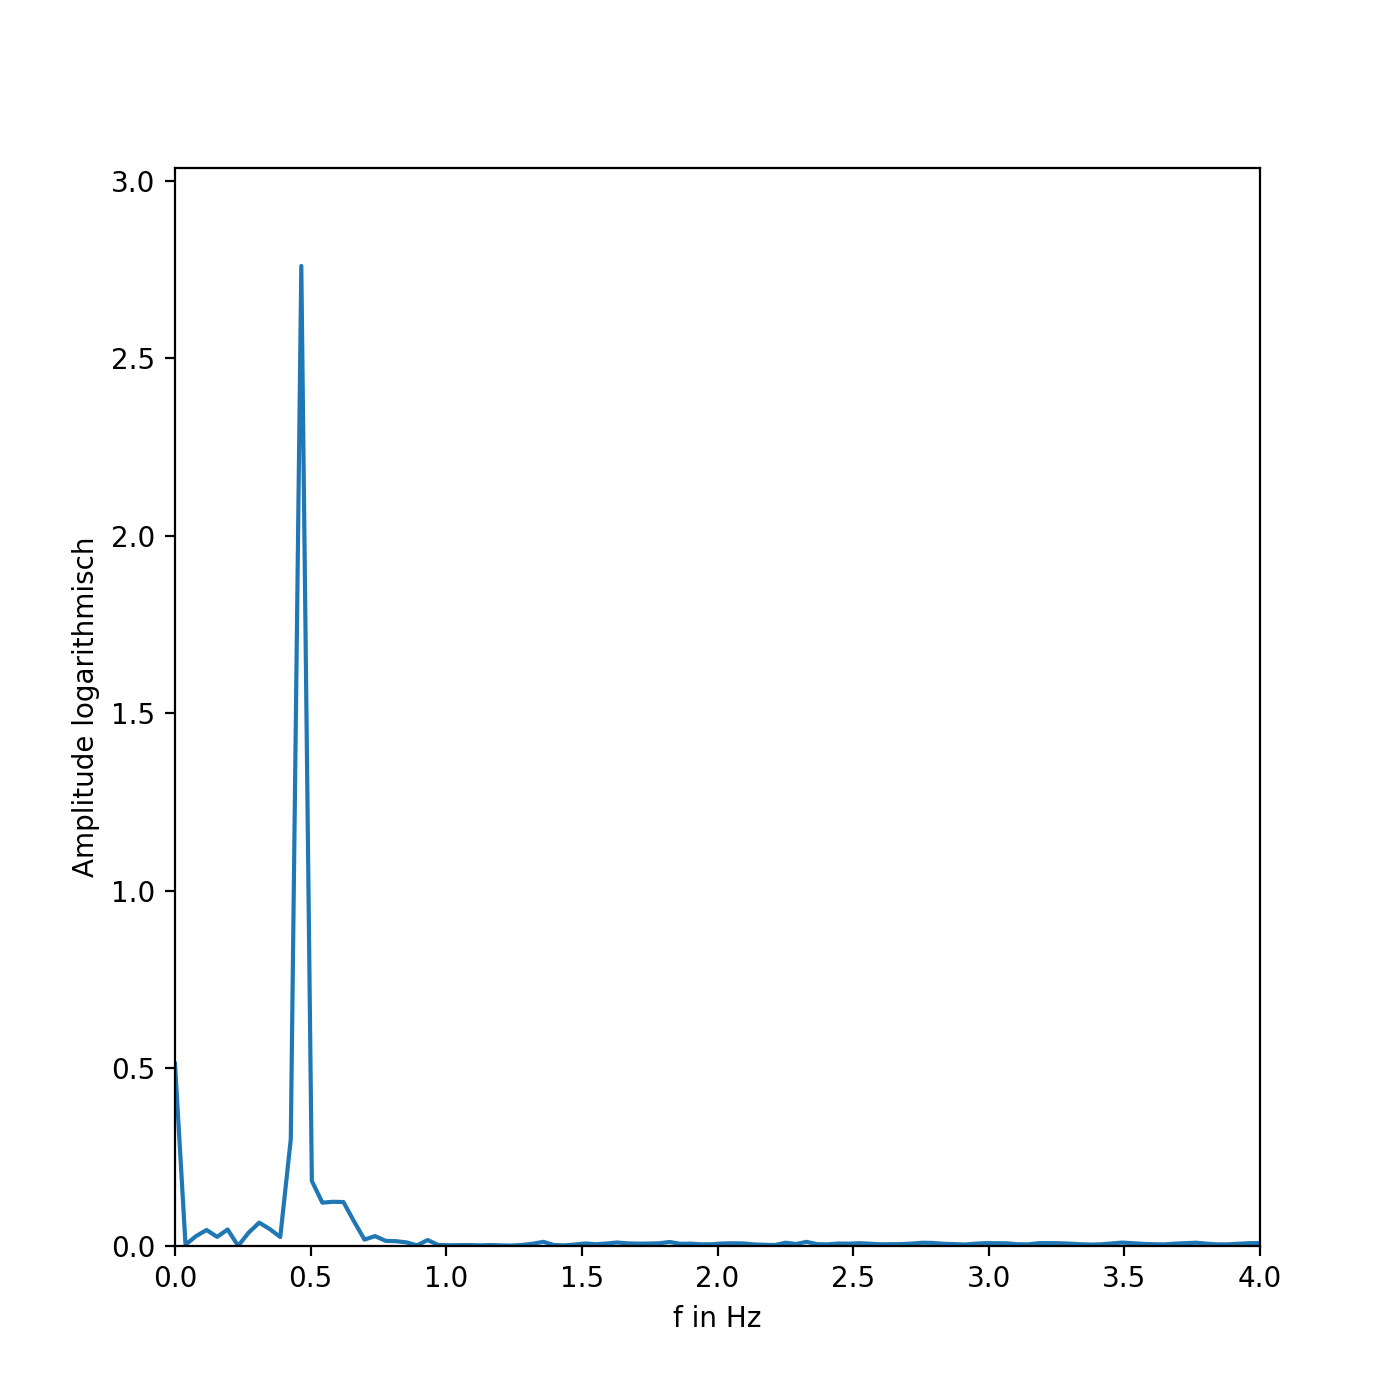

In [3]:

fig1=plt.figure(figsize=(7,7),dpi=100)
plt.plot(freq[0:int(N/2)],np.abs(sp.real[0:int(N/2)]*2/N),label=r'fft$(x(t))$')
plt.xlim([0,4])
plt.ylim([0,max(np.abs(sp.real[0:int(N/2)]*2/N))*1.1])
plt.ylabel('Amplitude')
plt.xlabel('f in Hz')
plt.savefig('hier_koennte_dein_Filename_stehen.png')
#plt.show()


#plt.plot(t, func(t, 11.5/25,4,-3/25,0))